# PageRank

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. "Случайные блуждания на графах"
* Документация:
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html
    * https://networkx.org/documentation/stable/reference/algorithms/centrality.html
    * https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

## Вопросы для совместного обсуждения

1\. Обсудите принцип работы алгоритма PageRank и подходы к его реализации.

In [1]:
import networkx as nx

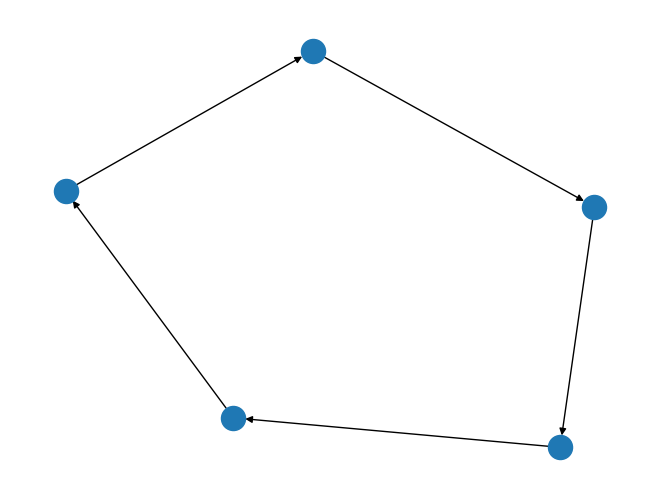

In [ ]:
G = nx.cycle_graph(5, create_using=nx.DiGraph)
nx.draw(G)

In [ ]:
pr = nx.pagerank(G, )
pr

{0: 0.2, 1: 0.2, 2: 0.2, 3: 0.2, 4: 0.2}

In [5]:
import numpy as np

G = nx.cycle_graph(5, create_using=nx.Graph)
A = nx.adjacency_matrix(G).toarray()
A

array([[0, 1, 0, 0, 1],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [0, 0, 1, 0, 1],
       [1, 0, 0, 1, 0]])

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(A)

In [ ]:
eigenvalues

array([-1.61803399,  0.61803399,  2.        , -1.61803399,  0.61803399])

In [ ]:
np.real(eigenvalues)

array([-1.61803399,  0.61803399,  2.        , -1.61803399,  0.61803399])

In [ ]:
eigenvectors[:, 2]

array([-0.4472136, -0.4472136, -0.4472136, -0.4472136, -0.4472136])

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Загрузите граф карате-клуба. Воспользовавшийся реализаций алгоритма PageRank из `networkx`, вычислите важность каждого узла в сети. Визуализируйте граф, отмасшабировав размер каждого узла пропорционально полученным значениям.

- [X] Проверено на семинаре

In [2]:
import matplotlib.pyplot as plt

In [ ]:
G = nx.karate_club_graph()

In [ ]:
pr = nx.pagerank(G)
pr

In [ ]:
node_size = [pr[node] * 10000 for node in G.nodes()]

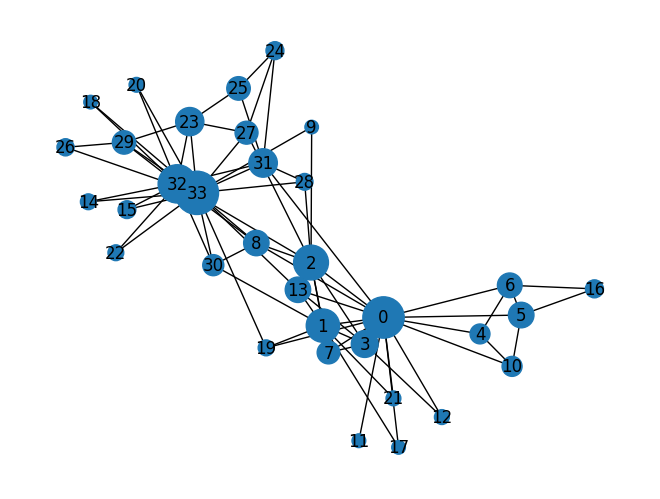

In [ ]:
nx.draw(G, with_labels=True, node_size=node_size)

<p class="task" id="2"></p>

2\. Постройте несколько визуализаций графа в виде сетки, используя другие меры центральности:
- центральность по степени;
- центральность по посредничеству;
- центральность по близости;
- центральность по собственному вектору;
- центральность по PageRank.

На каждом рисунке сделайте размеры узлов пропорционально соответствующей мере центральности. Сравните результаты и сделайте выводы.

- [X] Проверено на семинаре

In [ ]:
degree = nx.degree_centrality(G)
betweenness  = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)
eigenvector = nx.eigenvector_centrality(G)
pagerank = nx.pagerank(G)

In [ ]:
degree_size = [degree[node] * 1000 for node in G.nodes()]
betweenness_size = [betweenness[node] * 5000 for node in G.nodes()]
closeness_size = [closeness[node] * 1000 for node in G.nodes()]
eigenvector_size = [eigenvector[node] * 2000 for node in G.nodes()]
pagerank_size = [pagerank[node] * 5000 for node in G.nodes()]

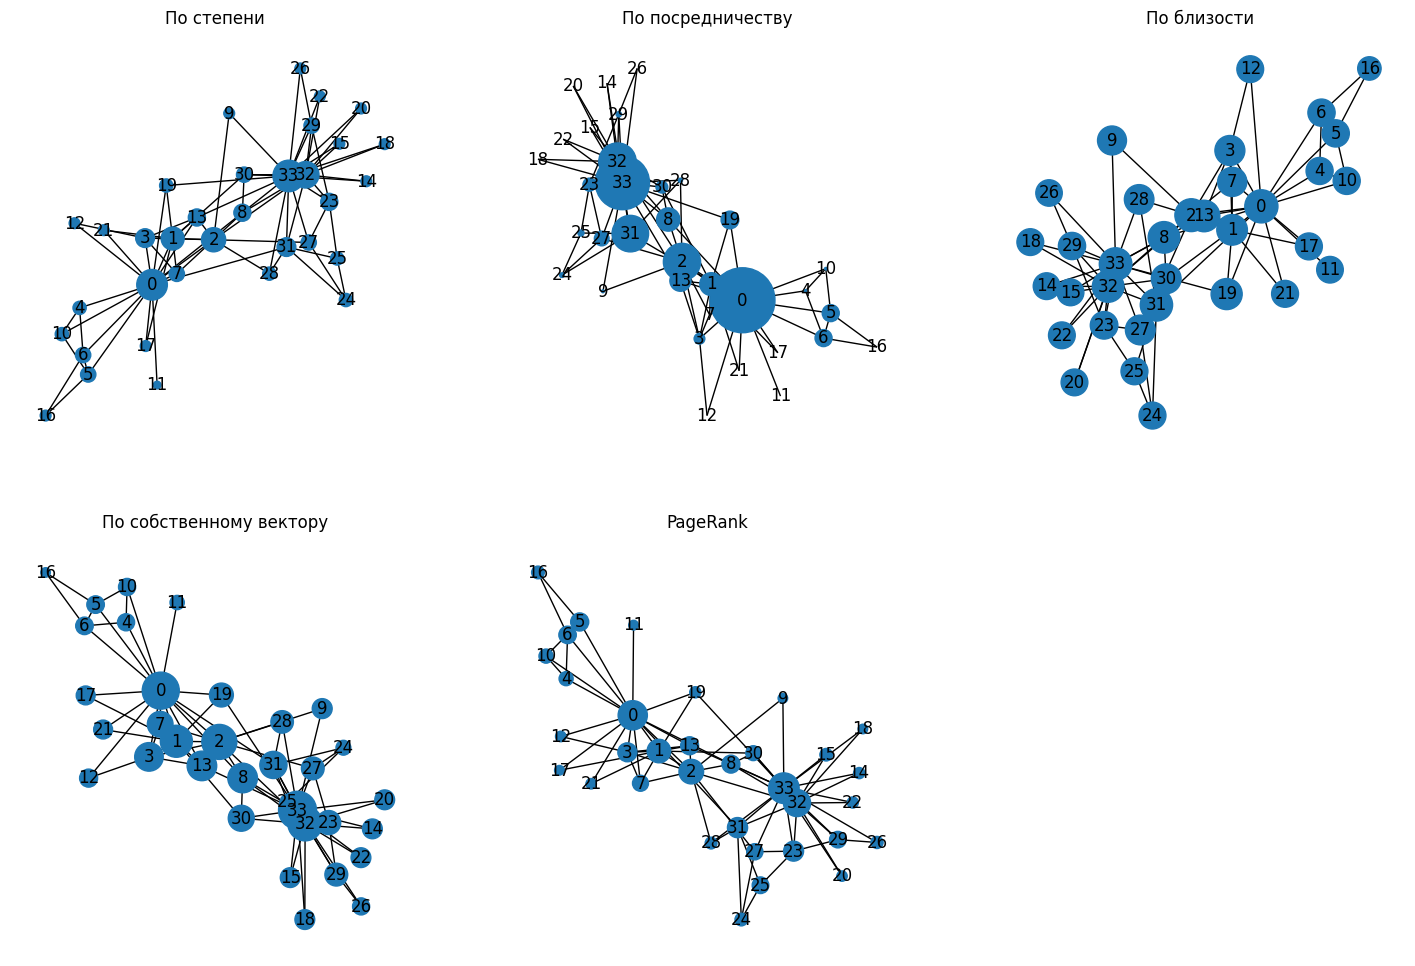

In [ ]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
nx.draw(G, with_labels=True, node_size=degree_size)
plt.title('По степени')

plt.subplot(2, 3, 2)
nx.draw(G, with_labels=True, node_size=betweenness_size)
plt.title('По посредничеству')

plt.subplot(2, 3, 3)
nx.draw(G, with_labels=True, node_size=closeness_size)
plt.title('По близости')

plt.subplot(2, 3, 4)
nx.draw(G, with_labels=True, node_size=eigenvector_size)
plt.title('По собственному вектору')

plt.subplot(2, 3, 5)
nx.draw(G, with_labels=True, node_size=pagerank_size)
plt.title('PageRank')

plt.show()


<p class="task" id="3"></p>

3\. Исследуйте, как влияют различные значение параметров `alpha` и `personalization` на результат работы алгоритма. Визуализируйте результаты аналогично предыдущим заданиям и прокомментируйте результат.

- [X] Проверено на семинаре

In [ ]:
def vis(ax, G, pageranks, title):
    sizes = [pageranks[node] * 5000 for node in G.nodes()]
    nx.draw(G, ax=ax, with_labels=True, node_size=sizes)
    ax.set_title(title)

In [ ]:
alphas = [0.1, 0.5, 0.9]
pers = [None, {1: 1}, {1: 0.5, 2: 0.5}]

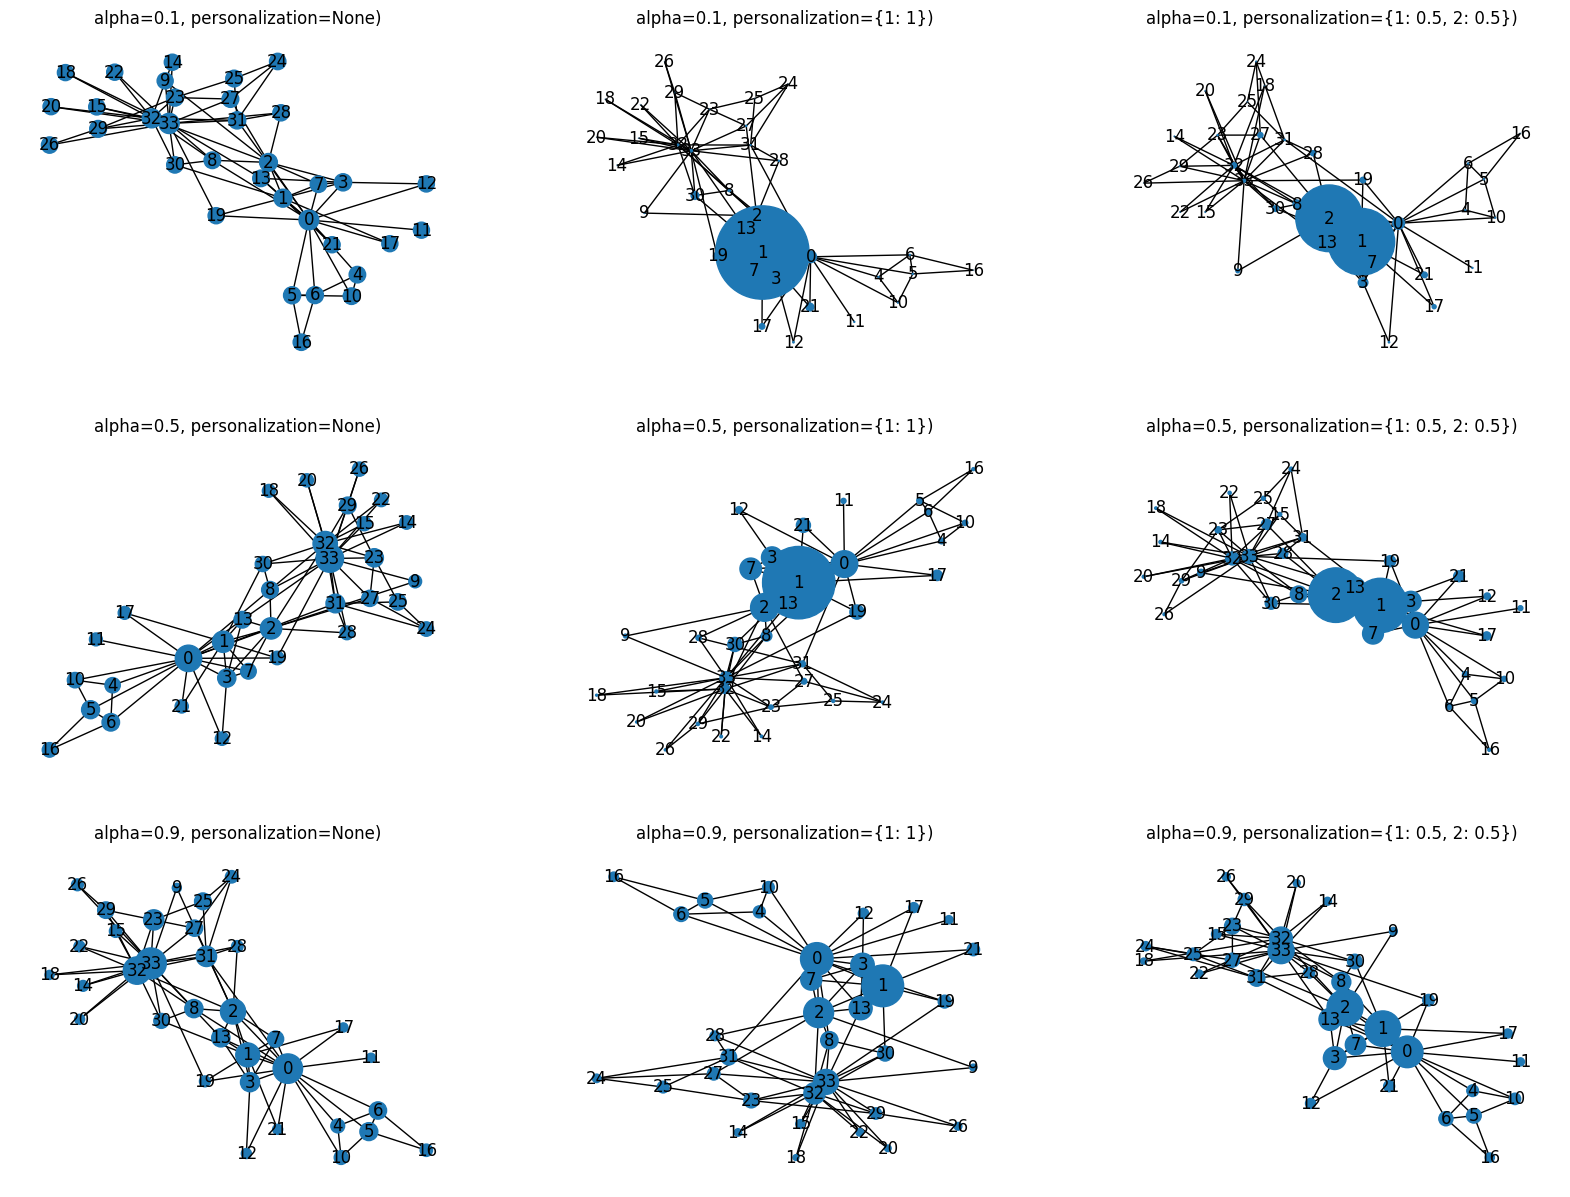

In [ ]:
fig, axs = plt.subplots(3,3, figsize=(20, 15))

for i, alpha in enumerate(alphas):
    for j, per in enumerate(pers):
        pagerank = nx.pagerank(G, alpha=alpha, personalization=per)
        title = f'alpha={alpha}, personalization={per})'
        vis(axs[i, j], G, pagerank, title)
plt.show()


<p class="task" id="4"></p>

4\. Реализуйте алгоритм PageRank с параметром затухания $\alpha=0.9$.

Загрузите граф карате-клуба и сделайте его ориентированным. Найдите стохастическую матрицу переходов $\mathbf{P}$.

$$\mathbf{P}=\mathbf{D}^{-1}\mathbf{A}$$

Модифицируйте матрицу $\mathbf{P}$:

$$\mathbf{P}' = \alpha \mathbf{P} + (1-\alpha)\frac{1}{n}\mathbf{E}$$
$$\mathbf{M}=(\mathbf{P}')^{\top}$$

где $\mathbf{E}$ - матрица размера `NxN`, состоящая из единиц.

$\mathbf{p}^0 = [\frac{1}{N}..., \frac{1}{N}]$
Получите вектор $\mathbf{p}^\infty = \mathbf{pr}^{iter}$, используя итеративную процедуру

$$\mathbf{p}^{t+1}=\mathbf{M}\mathbf{p}^t$$

Процесс заканчивается, когда $||\mathbf{p}^{t+1} - \mathbf{p}^{t}|| < \epsilon $

Выведите полученный вектор стационарного состояния на экран.
Вызовите `nx.pagerank` с соответствующими параметрами и докажите, что полученные векторы совпадают.

- [X] Проверено на семинаре

In [23]:
G = nx.karate_club_graph()
G = G.to_directed()


In [24]:
n = len(G.nodes())
A = nx.to_numpy_array(G)
D = np.diag(np.sum(A, axis=1))
P = np.dot(np.linalg.inv(D), A)

In [25]:
alpha = 0.9
E = np.ones((n, n))
P_p = alpha * P + (1 - alpha) * (1 / n) * E
M = P_p.T

In [26]:
p_t = np.ones(n) / n
epsilon = 0.00001
d = 1

In [27]:
while d > epsilon:
    p_new = np.dot(M, p_t)
    d = np.linalg.norm(p_new - p_t)
    p_t = p_new

In [28]:
pr = nx.pagerank(G, alpha=0.9)

In [29]:
np.allclose(p_new,list(pr.values()), rtol=0.0001)

True

<p class="task" id="5"></p>

5\. Вычислите коэффициенты PageRank при помощи задачи нахождения собственного вектора матрицы $\mathbf{M}$ $\mathbf{pr}^{eig}$, соответствующего собственному числу 1.

Покажите, что $\mathbf{pr}^{eig}$ и $\mathbf{pr}^{iter}$ оба являются с.в. матрицы $\mathbf{M}$.

- [ ] Проверено на семинаре

In [39]:
eigenvalues, eigenvectors = np.linalg.eig(M)

In [40]:
index = np.argmin(np.abs(eigenvalues - 1))
pr_eig = eigenvectors[:, index].real
pr_eig /= np.sum(pr_eig)

In [43]:
np.allclose(p_new,pr_eig, rtol=0.001)

True